In [1]:
import utils
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# test_data_dir = '../examples/PyMPDATA_examples/Arabas_and_Farhat_2020/data/'
train_data_dir = './data/'

In [17]:
data_full = utils.load_data(train_data_dir, 10000)

100%|██████████| 9999/9999 [00:05<00:00, 1984.36it/s]


In [18]:
with open('data_full_4.pkl', 'wb') as f:
    pickle.dump(data_full, f)

In [19]:
train_stencils, val_stencils = utils.get_stencils_2(data_full, 3, [(0, 3), (7, 10)], [(4, 6)])

df_train = pd.DataFrame(train_stencils, columns=['input', 'flux'])
df_test = pd.DataFrame(val_stencils, columns=['input', 'flux'])

print(f"{df_train.shape=}, {df_test.shape=}")

train_start_1=0,train_end_1=2997, val_start_1=3996, val_end_1=5994
len(data_train)=5994, len(data_val)=1998
df_train.shape=(605394, 2), df_test.shape=(201798, 2)


In [6]:
model = utils.get_model(n_hidden_layers=2, n_neurons=10)
model, history = utils.train_model(model, df_train, df_test, epochs=5)
model.save('model_different_split_longer_2.h5')

Epoch 1/5
18919/18919 [==============================] - 28s 1ms/step - loss: 1.4382e-04 - val_loss: 2.4033e-05
Epoch 2/5
18919/18919 [==============================] - 27s 1ms/step - loss: 1.3917e-05 - val_loss: 2.3106e-05
Epoch 3/5
18919/18919 [==============================] - 27s 1ms/step - loss: 1.3029e-05 - val_loss: 2.4325e-05
Epoch 4/5
18919/18919 [==============================] - 27s 1ms/step - loss: 1.2230e-05 - val_loss: 2.0754e-05
Epoch 5/5
18919/18919 [==============================] - 28s 1ms/step - loss: 1.1596e-05 - val_loss: 2.6303e-05


4/4 [==============================] - 0s 0s/step


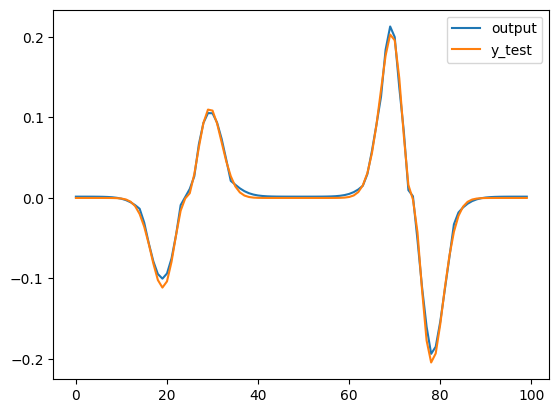

In [7]:
utils.visualize_output(model, df_test[-100:])

In [8]:
train_stencils, val_stencils = utils.get_stencils_2(data_full, 3, [(0, 2), (8, 10)], [(4, 6)])

df_train = pd.DataFrame(train_stencils, columns=['input', 'flux'])
df_test = pd.DataFrame(val_stencils, columns=['input', 'flux'])

print(f"{df_train.shape=}, {df_test.shape=}")

train_start_1=0,train_end_1=1998, val_start_1=3996, val_end_1=5994
len(data_train)=3996, len(data_val)=1998
df_train.shape=(403596, 2), df_test.shape=(201798, 2)


In [9]:
model = utils.get_model(n_hidden_layers=2, n_neurons=10)
model, history = utils.train_model(model, df_train, df_test, epochs=5)
model.save('model_different_split2_longer_2.h5')

Epoch 1/5
12613/12613 [==============================] - 22s 2ms/step - loss: 2.0303e-04 - val_loss: 7.3209e-05
Epoch 2/5
12613/12613 [==============================] - 20s 2ms/step - loss: 2.4630e-05 - val_loss: 2.9329e-05
Epoch 3/5
12613/12613 [==============================] - 21s 2ms/step - loss: 1.1531e-05 - val_loss: 2.8165e-05
Epoch 4/5
12613/12613 [==============================] - 20s 2ms/step - loss: 1.0723e-05 - val_loss: 3.0254e-05
Epoch 5/5
12613/12613 [==============================] - 20s 2ms/step - loss: 9.9271e-06 - val_loss: 3.1859e-05


4/4 [==============================] - 0s 0s/step


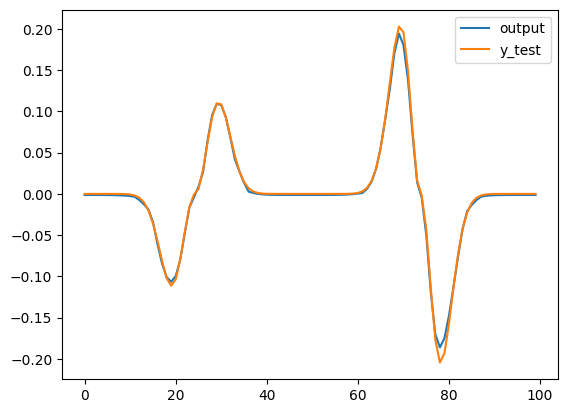

In [10]:
utils.visualize_output(model, df_test[-100:])

4/4 [==============================] - 0s 5ms/step
y_test_sum=0.0023063920998164515, output_sum=-0.056840494


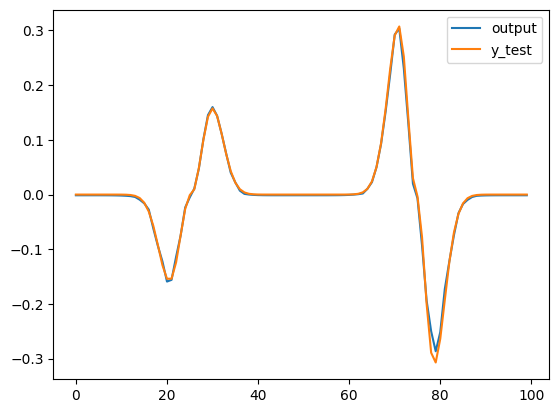

In [11]:
utils.sanity_check(model, df_test[:100])

In [10]:
model2 = keras.models.load_model('model_different_split2_longer.h5')

In [11]:
def sanity_check(model, val_data, scaling_factor=1):
    X_test = val_data['input']
    y_test = val_data['flux']
    X_test, y_test = np.stack(X_test), np.stack(y_test)
    # calculate the sum of y_test and the prediction
    y_test_sum = np.sum(y_test)
    outputs = model.predict(X_test)
    output = np.concatenate(outputs)*scaling_factor
    # output_sum = np.sum(output)
    # print(f"{y_test_sum=}, {output_sum=}")
    plt.plot(output)
    plt.plot(y_test)
    plt.legend(['output', 'y_test'])
    plt.show()

4/4 [==============================] - 0s 5ms/step


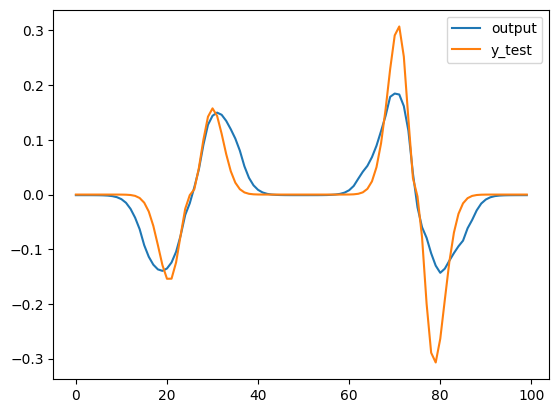

In [21]:
sanity_check(model2, df_test[:100], scaling_factor=0.08)

In [ ]:
# Load the model

In [6]:
model = utils.get_model(n_hidden_layers=2, n_neurons=10)
model, history = utils.train_model(model, df_train, df_test, epochs=5)
model.save('model_different_split_longer_3.h5')

Epoch 1/5
18919/18919 [==============================] - 40s 2ms/step - loss: 1.0500e-04 - val_loss: 9.6470e-06
Epoch 2/5
18919/18919 [==============================] - 37s 2ms/step - loss: 8.7427e-06 - val_loss: 7.8658e-06
Epoch 3/5
18919/18919 [==============================] - 41s 2ms/step - loss: 6.9861e-06 - val_loss: 3.8396e-06
Epoch 4/5
18919/18919 [==============================] - 37s 2ms/step - loss: 5.2711e-06 - val_loss: 1.7934e-05
Epoch 5/5
18919/18919 [==============================] - 39s 2ms/step - loss: 5.2697e-06 - val_loss: 4.4608e-06


4/4 [==============================] - 0s 4ms/step


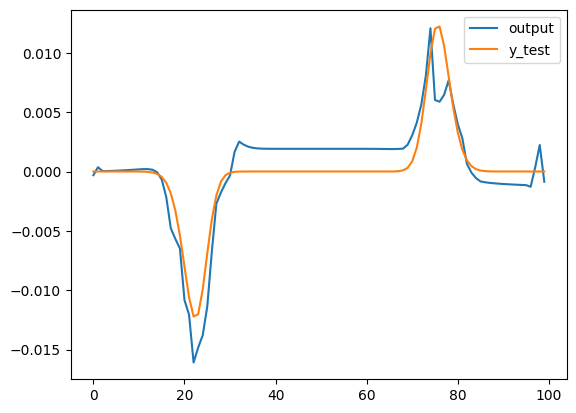

In [7]:
utils.visualize_output(model, df_test[-100:])

In [8]:
train_stencils, val_stencils = utils.get_stencils_2(data_full, 3, [(0, 2), (8, 10)], [(4, 6)])

df_train = pd.DataFrame(train_stencils, columns=['input', 'flux'])
df_test = pd.DataFrame(val_stencils, columns=['input', 'flux'])

print(f"{df_train.shape=}, {df_test.shape=}")

train_start_1=0,train_end_1=1998, val_start_1=3996, val_end_1=5994
len(data_train)=3996, len(data_val)=1998
df_train.shape=(403596, 2), df_test.shape=(201798, 2)


In [ ]:
model = utils.get_model(n_hidden_layers=2, n_neurons=10)
model, history = utils.train_model(model, df_train, df_test, epochs=5)
model.save('model_different_split2_longer_3.h5')

4/4 [==============================] - 0s 0s/step


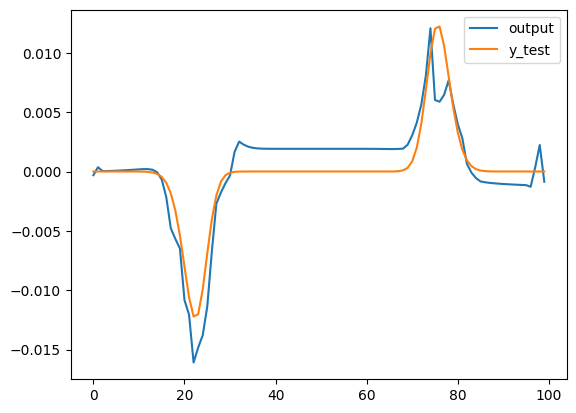

In [9]:
utils.visualize_output(model, df_test[-100:])

4/4 [==============================] - 0s 0s/step


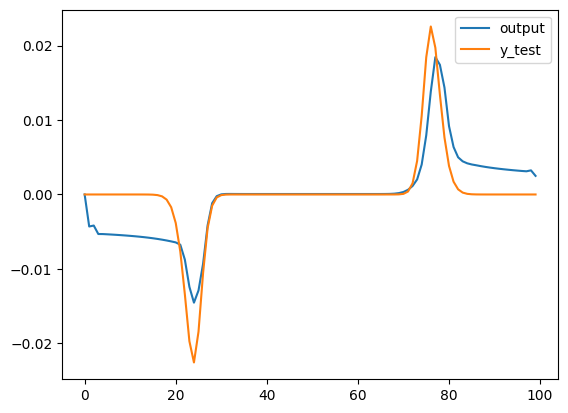

In [15]:
sanity_check(model2, df_test[:100], scaling_factor=0.01)

In [20]:
model = utils.get_model(n_hidden_layers=2, n_neurons=10)
model, history = utils.train_model(model, df_train, df_test, epochs=5)
model.save('model_different_split_longer_4.h5')

Epoch 1/5
18919/18919 [==============================] - 36s 2ms/step - loss: 6.5026e-05 - val_loss: 4.4298e-06
Epoch 2/5
18919/18919 [==============================] - 34s 2ms/step - loss: 9.9027e-06 - val_loss: 2.1508e-06
Epoch 3/5
18919/18919 [==============================] - 37s 2ms/step - loss: 8.6605e-06 - val_loss: 2.6760e-06
Epoch 4/5
18919/18919 [==============================] - 36s 2ms/step - loss: 7.5976e-06 - val_loss: 1.6546e-06
Epoch 5/5
18919/18919 [==============================] - 39s 2ms/step - loss: 6.8152e-06 - val_loss: 4.3059e-06


4/4 [==============================] - 0s 5ms/step


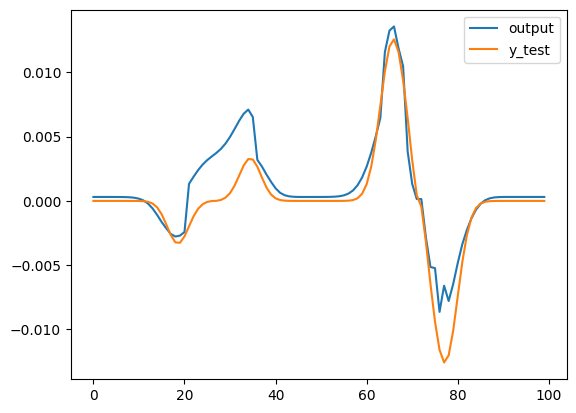

In [21]:
utils.visualize_output(model, df_test[-100:])

In [22]:
train_stencils, val_stencils = utils.get_stencils_2(data_full, 3, [(0, 2), (8, 10)], [(4, 6)])

df_train = pd.DataFrame(train_stencils, columns=['input', 'flux'])
df_test = pd.DataFrame(val_stencils, columns=['input', 'flux'])

print(f"{df_train.shape=}, {df_test.shape=}")

train_start_1=0,train_end_1=1998, val_start_1=3996, val_end_1=5994
len(data_train)=3996, len(data_val)=1998
df_train.shape=(403596, 2), df_test.shape=(201798, 2)


In [23]:
model = utils.get_model(n_hidden_layers=2, n_neurons=10)
model, history = utils.train_model(model, df_train, df_test, epochs=5)
model.save('model_different_split2_longer_4.h5')

Epoch 1/5
12613/12613 [==============================] - 33s 3ms/step - loss: 1.0936e-04 - val_loss: 1.9509e-05
Epoch 2/5
12613/12613 [==============================] - 32s 3ms/step - loss: 2.4381e-05 - val_loss: 3.2463e-05
Epoch 3/5
12613/12613 [==============================] - 34s 3ms/step - loss: 1.9334e-05 - val_loss: 2.1110e-05
Epoch 4/5
12613/12613 [==============================] - 33s 3ms/step - loss: 1.6776e-05 - val_loss: 1.3171e-05
Epoch 5/5
12613/12613 [==============================] - 28s 2ms/step - loss: 1.5340e-05 - val_loss: 1.8143e-05


4/4 [==============================] - 0s 5ms/step


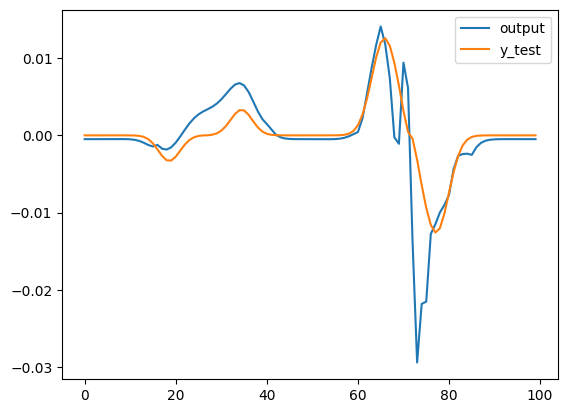

In [24]:
utils.visualize_output(model, df_test[-100:])

4/4 [==============================] - 0s 0s/step


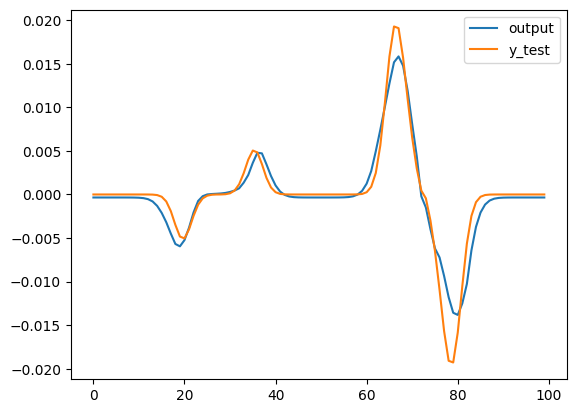

In [25]:
sanity_check(model2, df_test[:100], scaling_factor=0.01)